In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [138]:
os.chdir('D:\Deeksha\Data Science-Deeksha\Capstone Project')

In [139]:
a1=pd.read_excel('Preprocessed Data.xlsx')

In [140]:
def boxplot_outlier_removal(X, exclude=['']):
    '''
    remove outliers detected by boxplot (Q1/Q3 -/+ IQR*1.5)

    Parameters
    ----------
    X : dataframe
      dataset to remove outliers from
    exclude : list of str
      column names to exclude from outlier removal

    Returns
    -------
    X : dataframe
      dataset with outliers removed
    '''
    before = len(X)

    # iterate each column
    for col in X.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (X[col] > Q1 - 1.5 * IQR) & (X[col] < Q3 + 1.5 *IQR)
            X = X[filter_]

    after = len(X)
    diff = before-after
    percent = diff/before*100
    print('{} ({:.2f}%) outliers removed'.format(diff, percent))
    return X

In [141]:
#exclude list for outliers... not removing outliers for Est fam contribution and unmet need for new dataset
exclude_list=['STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','STDNT_MINOR',
              'FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F',
              'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F','SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S',
                'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S','HOUSING_STS','RETURNED_2ND_YR',
              'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','age_group','CORE_COURSE_NAME_1_F_GROUPED',
              'CORE_COURSE_NAME_2_F_GROUPED','CORE_COURSE_NAME_3_F_GROUPED','CORE_COURSE_NAME_1_S_GROUPED',
              'CORE_COURSE_NAME_2_S_GROUPED','STDNT_AGE','RETURNED_2ND_YR','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','COST_OF_ATTEND']

data=a1

data.shape

(3400, 35)

In [142]:
boxplot_outlier_removal(data,exclude_list)

1041 (30.62%) outliers removed


,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,...,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,A,...,3,No Information,16,16,14,14,0,0,0,0.0
2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,A,...,4,Other/Unknown,15,15,14,14,0,0,0,0.0
3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,A,...,3,College/Beyond,13,13,14,14,0,0,0,0.0
4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,A,...,2,High School,12,12,12,12,835920,1355760,519840,278340.0
5,18,M,BGD 1,Y,Political Science,N,1070,2010-08,ARAB 1001,A,...,3,College/Beyond,15,15,16,16,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,19,M,BGD 3,Y,Psychology,N,990,2008-08,ECON 2106,F,...,2,High School,12,6,14,13,0,0,0,0.0
3391,18,F,BGD 1,N,Pre-Business,N,990,2010-08,ITDS 2749,F,...,3,No Information,17,6,14,13,0,0,0,0.0
3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,B,...,3,No Information,13,9,14,13,0,0,0,0.0
3398,18,F,BGD 3,Y,Joint Enrollment - Accel,N,990,2010-08,PSYC 1101,C,...,3,College/Beyond,12,9,14,13,0,269100,0,-231720.0


In [143]:
#One hot encoding for bigger variables
def on_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(df[variable]==label,1,0)

In [144]:
top_10=[x for x in data.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]

In [145]:
on_hot_top_x(data,'STDNT_MAJOR',top_10)

In [146]:
data.shape

(3400, 45)

In [147]:
top_10=[x for x in data.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]
on_hot_top_x(data,'CORE_COURSE_NAME_1_F',top_10)


In [148]:
data.shape

(3400, 55)

In [149]:
top_10=[x for x in data.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_2_F',top_10)

data.shape

(3400, 65)

In [150]:
top_10=[x for x in data.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_3_F',top_10)
data.shape

(3400, 75)

In [151]:
top_10=[x for x in data.CORE_COURSE_NAME_1_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_1_S',top_10)
data.shape

(3400, 85)

In [152]:
top_10=[x for x in data.CORE_COURSE_NAME_2_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_2_S',top_10)
data.shape

(3400, 95)

In [153]:
del_list=['STDNT_MAJOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']
data.drop(del_list,axis=1)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,...,CORE_COURSE_NAME_2_S_ENGL 1102,CORE_COURSE_NAME_2_S_COMM 1110,CORE_COURSE_NAME_2_S_POLS 1101,CORE_COURSE_NAME_2_S_HIST 2111,CORE_COURSE_NAME_2_S_HIST 2112,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ARTH 1100
0,18,F,BGD 1,Y,N,1150,2007-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
1,19,F,BGD 1,N,N,1190,2008-08,A,A,A,...,1,0,0,0,0,0,0,0,0,0
2,18,M,BGD 1,Y,N,1030,2010-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
3,18,M,BGD 1,Y,N,1220,2007-08,A,A,B,...,0,0,0,0,1,0,0,0,0,0
4,18,F,BGD 1,Y,N,1190,2008-08,A,A,A,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,F,BGD 4,N,N,790,2008-08,A,B,B,...,1,0,0,0,0,0,0,0,0,0
3396,18,F,BGD 1,Y,N,950,2007-08,B,B,B,...,1,0,0,0,0,0,0,0,0,0
3397,18,F,BGD 4,Y,N,1030,2008-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0
3398,18,F,BGD 3,Y,N,990,2010-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0


In [154]:
data2=data

drop_col_final=['STDNT_GENDER','STDNT_MINOR','STDNT_TEST_ENTRANCE_COMB','DISTANCE_FROM_HOME','HIGH_SCHL_GPA','FATHER_HI_EDU_CD',
               'MOTHER_HI_EDU_CD','FIRST_TERM_ATTEMPT_HRS','GROSS_FIN_NEED','UNMET_NEED']

data2=data2.drop(drop_col_final,axis=1)

In [155]:
def subject_grade(data2,sub):
    data2[sub+'_Num']=np.where(data2[sub]=='A', 1,
                                      np.where(data2[sub]=='B', 2,
                                      np.where(data2[sub]=='C', 3,
                                      np.where(data2[sub]=='D', 4,
                                      np.where(data2[sub]=='F', 5,
                                      np.where(data2[sub]=='NOT REP', 6,
                                      np.where(data2[sub]=='INCOMPL', 7,8)))))))
    return data2

In [156]:
subject_grade(data2,'CORE_COURSE_GRADE_1_F')
subject_grade(data2,'CORE_COURSE_GRADE_2_F')
subject_grade(data2,'CORE_COURSE_GRADE_3_F')
subject_grade(data2,'CORE_COURSE_GRADE_1_S')
subject_grade(data2,'CORE_COURSE_GRADE_2_S')

,STDNT_AGE,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,...,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ARTH 1100,CORE_COURSE_GRADE_1_F_Num,CORE_COURSE_GRADE_2_F_Num,CORE_COURSE_GRADE_3_F_Num,CORE_COURSE_GRADE_1_S_Num,CORE_COURSE_GRADE_2_S_Num
0,18,BGD 1,Y,Undeclared,2007-08,ANTH 1105,A,ARTH 1100,A,ENGL 1102,...,0,0,0,0,0,1,1,1,1,1
1,19,BGD 1,N,Undeclared,2008-08,ANTH 1105,A,GERM 1002,A,ITDS 2735,...,0,0,0,0,0,1,1,1,1,1
2,18,BGD 1,Y,Mathematics,2010-08,ANTH 1105,A,ENGL 1101,A,HIST 2111,...,0,0,0,0,0,1,1,1,1,1
3,18,BGD 1,Y,Undeclared,2007-08,ANTH 1107,A,COMM 1110,A,ENGL 1101,...,0,0,0,0,0,1,1,2,1,1
4,18,BGD 1,Y,Art,2008-08,ANTH 1107,A,ARTH 1100,A,CPSC 1105,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,BGD 4,N,Music Performance,2008-08,COMM 1110,A,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,1,2,2,3,2
3396,18,BGD 1,Y,Biology,2007-08,POLS 1101,B,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,2,2,2,3,2
3397,18,BGD 4,Y,Biology,2008-08,ENGL 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2
3398,18,BGD 3,Y,Joint Enrollment - Accel,2010-08,PSYC 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2


In [157]:
data3=data2

del_final=['FIRST_TERM','SECOND_TERM','CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_1_S',
               'CORE_COURSE_GRADE_2_S','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F',
               'CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','STDNT_MAJOR']


In [158]:
data3=data3.drop(del_final,axis=1)

In [159]:
data4=pd.get_dummies(data3)

In [160]:
data4

,STDNT_AGE,RETURNED_2ND_YR,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,STDNT_MAJOR_Undeclared,STDNT_MAJOR_Biology,STDNT_MAJOR_Early Childhood Education,...,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown
0,18,0,16,14,14,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,19,1,18,18,18,1355760,785760,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,18,1,15,14,14,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,18,1,13,14,14,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,18,1,12,12,12,1355760,519840,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,0,18,16,13,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3396,18,0,9,14,13,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3397,18,0,6,14,13,945840,1288980,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3398,18,1,9,14,13,269100,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [161]:
X=data4.drop('RETURNED_2ND_YR',axis=1)

In [162]:
y=data3['RETURNED_2ND_YR']

In [163]:
X.shape

(3400, 93)

In [83]:
y

0       0
1       1
2       1
3       1
4       1
       ..
3395    0
3396    0
3397    0
3398    1
3399    0
Name: RETURNED_2ND_YR, Length: 3400, dtype: int64

In [164]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [165]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

In [166]:
X_test_res,y_test_res=sm.fit_sample(X_test,y_test)

In [167]:
from collections import Counter
print('Original Dataset shape {}'.format(Counter(y)))
print('Aftersampling Dataset shape{}'.format(Counter(y_train_res)))

Original Dataset shape Counter({1: 2677, 0: 723})
Aftersampling Dataset shapeCounter({1: 1876, 0: 1876})


In [168]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=1,random_state=400)
clf.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=500, n_jobs=1, oob_score=True,
                       random_state=400)

In [169]:
y_pred = clf.predict(X_test_res)

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_res, y_pred)
print(confusion_matrix)

[[594 207]
 [ 40 761]]


In [171]:
from collections import Counter
print('Original Dataset shape {}'.format(Counter(y)))
print('Aftersampling Dataset shape{}'.format(Counter(y_test_res)))

Original Dataset shape Counter({1: 2677, 0: 723})
Aftersampling Dataset shapeCounter({1: 801, 0: 801})


In [172]:
clf.oob_score_

0.8859275053304904

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       801
           1       0.79      0.95      0.86       801

    accuracy                           0.85      1602
   macro avg       0.86      0.85      0.84      1602
weighted avg       0.86      0.85      0.84      1602



In [40]:
for w in range (100,1000,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=1,random_state=400)
    clf.fit(X_train_res,y_train_res)
    oob=clf.oob_score_
    print ('For n_estimators =' +str(w))
    print ('OOB score = ' +str(oob))
    print ('___********___')

For n_estimators =100
OOB score = 0.8789978678038379
___********___
For n_estimators =110
OOB score = 0.8781982942430704
___********___
For n_estimators =120
OOB score = 0.8816631130063965
___********___
For n_estimators =130
OOB score = 0.880863539445629
___********___
For n_estimators =140
OOB score = 0.8851279317697228
___********___
For n_estimators =150
OOB score = 0.8827292110874201
___********___
For n_estimators =160
OOB score = 0.8829957356076759
___********___
For n_estimators =170
OOB score = 0.884594882729211
___********___
For n_estimators =180
OOB score = 0.8837953091684435
___********___
For n_estimators =190
OOB score = 0.884594882729211
___********___
For n_estimators =200
OOB score = 0.8859275053304904
___********___
For n_estimators =210
OOB score = 0.8859275053304904
___********___
For n_estimators =220
OOB score = 0.8856609808102346
___********___
For n_estimators =230
OOB score = 0.8856609808102346
___********___
For n_estimators =240
OOB score = 0.887260127931769

KeyboardInterrupt: 

In [174]:
clf=RandomForestClassifier(n_estimators=320,oob_score=True,n_jobs=1,random_state=400)
clf.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=320, n_jobs=1, oob_score=True,
                       random_state=400)

In [115]:
clf.oob_score_

0.8877931769722814

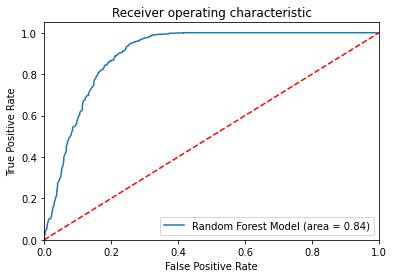

In [125]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

new = RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=1,random_state=400)
new.fit(X_train_res,y_train_res)
new_roc_auc = roc_auc_score(y_test_res, new.predict(X_test_res))
fprnew, tprnew, thresholds_new = roc_curve(y_test_res, new.predict_proba(X_test_res)[:,1])

plt.figure()
plt.plot(fprnew, tprnew, label='Random Forest Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())
imp_feat.sort_values(ascending=False)

SECOND_TERM_ATTEMPT_HRS           0.065380
SECOND_TERM_EARNED_HRS            0.057013
FIRST_TERM_EARNED_HRS             0.040925
CORE_COURSE_GRADE_1_S_Num         0.037271
COST_OF_ATTEND                    0.035965
                                    ...   
CORE_COURSE_NAME_2_S_MUSC 1100    0.002340
CORE_COURSE_NAME_2_S_ARTH 1100    0.001820
STDNT_BACKGROUND_BGD 7            0.000339
STDNT_BACKGROUND_BGD 5            0.000261
STDNT_BACKGROUND_BGD 8            0.000151
Length: 93, dtype: float64

<AxesSubplot:>

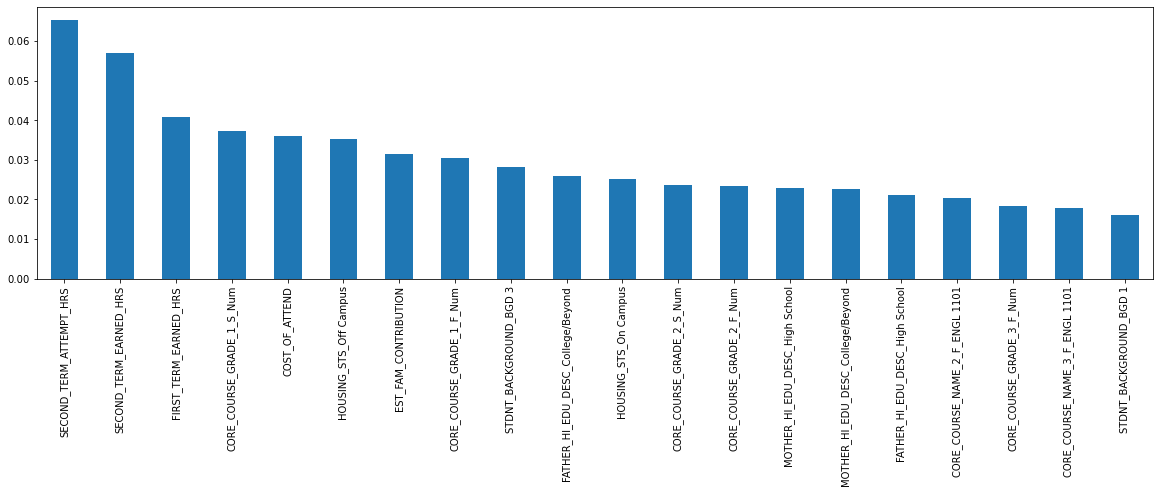

In [175]:
imp_feat.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(20,5))

Accuracy of the GBM on test set: 0.776
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       219
           1       0.83      0.90      0.86       801

    accuracy                           0.78      1020
   macro avg       0.65      0.61      0.62      1020
weighted avg       0.75      0.78      0.76      1020



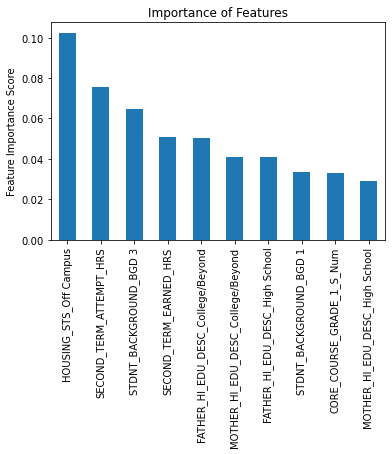

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve,GridSearchCV

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train_res,y_train_res)
predictors=list(X_train_res)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(10).plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.776


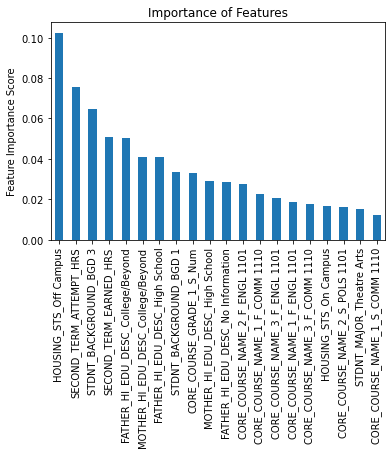

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve,GridSearchCV

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train_res,y_train_res)
predictors=list(X_train_res)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(20).plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))




In [49]:
#Hyperparameter Tuning 
t1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = t1, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.cv_results_ , tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 0.31007433,  0.66175203,  1.27627082,  2.01323223,  5.09069271,
          6.35154057,  8.27477393,  9.98008595,  0.62118411,  1.5072041 ,
          2.62923207,  4.06827102,  5.6562469 ,  6.88573866,  8.65576649,
         10.08617625,  0.63832426,  1.45070577,  2.63881388,  4.41340303,
          5.33571434,  6.99160643,  8.3724833 ,  9.53845925,  0.55587025,
          1.24588428,  2.7318943 ,  3.7903265 ,  5.51061654,  5.24217601,
          6.89465871,  9.57429738,  0.6332396 ,  1.49624596,  2.29725628,
          4.41325202,  5.64396248,  6.89025283,  8.13701191,  9.37796173,
          0.59653397,  1.53082247,  2.6742043 ,  4.18809738,  5.49308748,
          6.65286965,  8.2511848 ,  9.03080273]),
  'std_fit_time': array([0.00557956, 0.01957822, 0.05749476, 0.18317985, 0.5982045 ,
         0.28055456, 0.23225332, 0.41508918, 0.00945432, 0.03537322,
         0.32183791, 0.25947058, 0.10506042, 0.33314534, 0.24561567,
         0.34959476, 0.02960915, 0.0572106 ,

In [50]:
t2 = {'max_depth':[2,3,4,5,6,7]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,min_samples_split=4, min_samples_leaf=1,max_features=7 , random_state=10), 
param_grid = t2, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 3.46769137,  4.74990697,  5.8844203 ,  7.95624185, 10.06966991,
         13.51087022]),
  'std_fit_time': array([0.07974367, 0.18621562, 0.21464822, 0.15312299, 0.28626292,
         0.47268645]),
  'mean_score_time': array([0.03676968, 0.04131317, 0.05806909, 0.05938139, 0.07273026,
         0.0843389 ]),
  'std_score_time': array([0.00285814, 0.01133198, 0.00325699, 0.01506151, 0.00792877,
         0.01427097]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.52996005, 0.54993342, 0.54327563, 0.56058589, 0.54993342,
         0.56458056]),
  'split1_test_score': array([0.83089214, 0.83754993, 0.84154461, 0.85352863, 0.84953395,
         0.86018642]),
  'split2_test_s

In [52]:
t3 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,max_depth=7, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = t3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

C:\Users\Deeksha Malik\nanaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'mean_fit_time': array([10.82406702, 10.1073844 ,  9.37982478,  9.12383785,  9.09756207,
          8.46639853,  7.20253816,  6.77830734,  6.4314765 ,  8.49846487,
          8.50962048,  8.12729278,  7.76165285,  7.3259706 ,  6.77863331,
          6.0721499 ,  5.69452605,  5.41825514,  7.90001979,  8.37619791,
          7.44630117,  5.98072186,  5.62774506,  5.08657246,  4.67263422,
          4.55265923,  4.4932116 ,  5.54530125,  5.60359235,  5.51760254,
          5.77321558,  5.28591862,  5.3629425 ,  4.82357163,  4.68578115,
          4.3746974 ,  5.28765888,  5.43406343,  5.28843222,  5.21075253,
          5.40394354,  5.18620958,  4.97140779,  4.59200535,  4.34716039]),
  'std_fit_time': array([0.16332092, 0.11083778, 0.1597672 , 0.20041281, 0.37663961,
         0.46291536, 0.13253945, 0.15340863, 0.10591503, 0.12803135,
         0.15813647, 0.15397723, 0.11247348, 0.16118309, 0.22966579,
         0.14810057, 0.13925707, 0.18203974, 0.56309949, 0.10667794,
         0.35954827, 0.

In [55]:
t4= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,max_depth=7, min_samples_split=10, min_samples_leaf=1,max_features=7 , random_state=10), 
param_grid = t4, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([28.36942945, 30.0737762 , 30.35440159, 30.03679814, 31.0805521 ,
         31.58683891, 29.10377612]),
  'std_fit_time': array([0.22765929, 1.02595163, 1.23139059, 0.33345004, 0.50330704,
         0.39258808, 1.21927759]),
  'mean_score_time': array([0.14511046, 0.13411736, 0.11552887, 0.14790897, 0.12092524,
         0.12971992, 0.13611865]),
  'std_score_time': array([0.02394647, 0.02112807, 0.01090421, 0.02999501, 0.00898261,
         0.01002124, 0.05184483]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'split0_test_score': array([0.55525965, 0.55792277, 0.56724368, 0.563249  , 0.55659121,
         0.55925433, 0.55525965]),
  'spli

In [54]:
t5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,max_depth=7, min_samples_split=10, min_samples_leaf=1, subsample=0.8, random_state=10), 
param_grid = t5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

C:\Users\Deeksha Malik\nanaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'mean_fit_time': array([3.76177874, 4.18496432, 4.52011762, 4.87070293, 5.10835028,
         4.75639849]),
  'std_fit_time': array([0.0890463 , 0.07636938, 0.06845916, 0.06984959, 0.1334221 ,
         0.52083804]),
  'mean_score_time': array([0.04010301, 0.04140863, 0.04454699, 0.04356775, 0.04459977,
         0.04085793]),
  'std_score_time': array([0.00285855, 0.00245414, 0.00396885, 0.00342169, 0.00487864,
         0.00692926]),
  'param_max_features': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 2},
   {'max_features': 3},
   {'max_features': 4},
   {'max_features': 5},
   {'max_features': 6},
   {'max_features': 7}],
  'split0_test_score': array([0.53395473, 0.54327563, 0.5539281 , 0.54993342, 0.56191744,
         0.57123835]),
  'split1_test_score': array([0.84553928, 0.84420772, 0.84154461, 0.84420772, 0.85885486,
         0.86018642]),
 

Accuracy of the GBM on test set: 0.781
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       801
           1       0.81      0.92      0.86       801

    accuracy                           0.85      1602
   macro avg       0.86      0.85      0.85      1602
weighted avg       0.86      0.85      0.85      1602



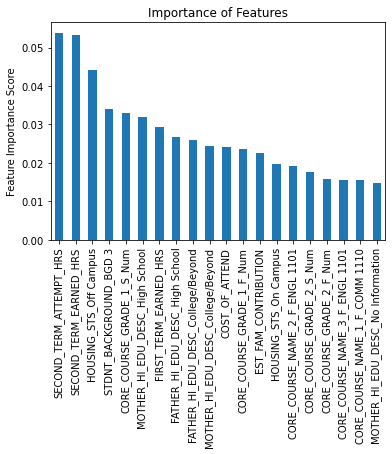

In [118]:
new=GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,max_depth=7, min_samples_split=10, 
                               min_samples_leaf=1,max_features=7 ,subsample=0.8, random_state=10)
new.fit(X_train_res,y_train_res)
predictors=list(X_train_res)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(20).plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test_res)
print(classification_report(y_test_res, pred))

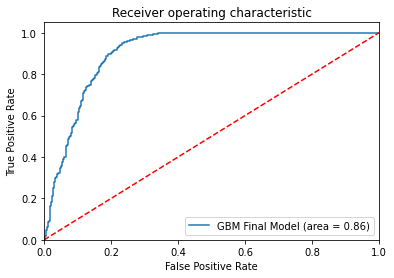

In [119]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

new = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1250,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)


new.fit(X_train_res,y_train_res)
new_roc_auc = roc_auc_score(y_test_res, new.predict(X_test_res))
fprnew, tprnew, thresholds_new = roc_curve(y_test_res, new.predict_proba(X_test_res)[:,1])

plt.figure()
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()